In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# New Section

In [17]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/RetailPulseAssignmentData.xlsx",sheet_name=['Year 2009-2010','Year 2010-2011'])

In [18]:
# Lets
df1=df['Year 2009-2010']
# df2=df['Year 2010-2011']

### Around 5 lakh data point we have

In [19]:
# Check the shape of the data
print(df1.shape)



(525461, 8)


#### Description and Country seems to have object type . May required to to change to other dtype to include in analysis

In [20]:
# Check the data types of each column
print(df1.dtypes)



Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


#### 0.005% of data missing in description column . 🤔

In [21]:
# Check for any missing values
print(df1.isnull().sum())



Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [22]:
# Look at the summary statistics
print(df1.describe())



            Quantity          Price    Customer ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000


### Key Point Concluded
* 417534 unique customers in the data
*mean Quantity is 10.34, but the standard deviation is large (107.42) indicating there is high variability in the quantities purchased
*maximum quantity is 19,152 showing there are some very large orders
*mean Price is £4.69. The large standard deviation (146.13) and wide range (-£53,594 to £25,111) indicates there is high variability in the prices
*total count of 525461 transactions is larger than the number of unique customers, indicating customers are making multiple purchases over time

In [97]:
# Look at the first 5 rows
df1.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


* Quantity mean (10.34) is greater than the median (3), indicating the distribution is likely right skewed.
* positive skew suggests there are more low quantity transactions than high, but some very large outliers on the high end
* mean (£4.69) is greater than the median (£2.10), indicating a right skewed distribution.
* more low priced transactions than high priced, but some expensive outliers extending the right tail.

In [99]:
# Combine the two DataFrames into one DataFrame
df3 = pd.concat([df['Year 2009-2010'], df['Year 2010-2011']], ignore_index=True)

In [100]:
df3.shape
df3.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [108]:
# Total money spent by customers from each country
df3['Total'] = df3['Price'] * df3['Quantity']
temp = df3.groupby('Country')['Total'].sum()
tempDF = pd.DataFrame({'Country':temp.index, 'Spend':temp.values})
tempDF = tempDF.sort_values('Spend', ascending=False)
tempDF = tempDF.iloc[:20]
tempDF.head()

,Country,Spend
40,United Kingdom,1.638258e+07
11,EIRE,6.155196e+05
26,Netherlands,5.485249e+05
15,Germany,4.179886e+05
14,France,3.281918e+05


<Axes: xlabel='Country'>

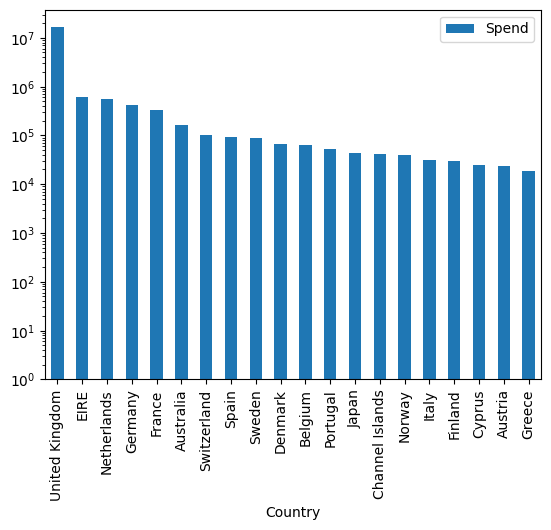

In [109]:
tempDF.plot(x='Country', y='Spend', kind='bar', log=True)



### Country like UK , EIRE , Netherland Germany bring most of sales .
### Rest of other country also bring consistant result



<Axes: xlabel='Country'>

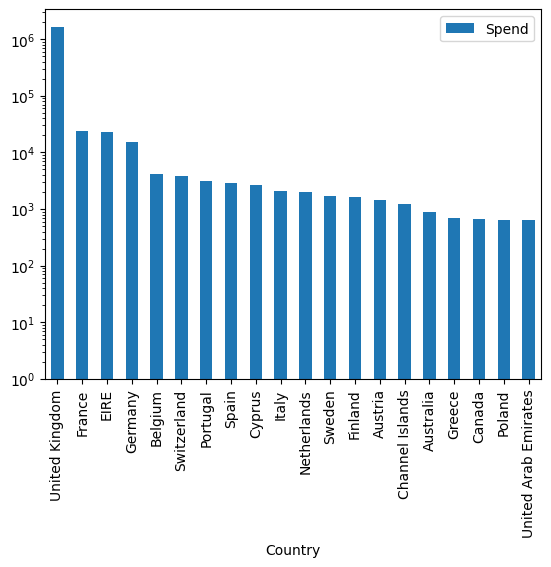

In [110]:
# Total money spent by customers from each country
df3['Total'] = df3['Price'] / df3['Quantity']
temp = df3.groupby('Country')['Total'].sum()
tempDF = pd.DataFrame({'Country':temp.index, 'Spend':temp.values})
tempDF = tempDF.sort_values('Spend', ascending=False)
tempDF = tempDF.iloc[:20]
tempDF.head()
tempDF.plot(x='Country', y='Spend', kind='bar', log=True)

### Surprisingly France , Belgium along  with UK , Germany bring high value sales . (price/quantity)

## Q1 Can customers be segmented into different categories? If yes then perform analysis on the same and also propose categories. If no, then explain why?

In [42]:
df3['Price per Quantity'] = df3['Price'] / df3['Quantity']
# Select the relevant columns
data = df3[['Customer ID', 'Price', 'Price per Quantity']]
data=data[data['Price'] >= 0 ]
data=data[data['Price per Quantity']>=0]

### There is negetive price value . It can be assumed as returned item . So customer can be divided into 2 categories . One who did not return purchased item and one who return

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Price']])


### here doing clustering of consumer who purchased but not returned

In [48]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

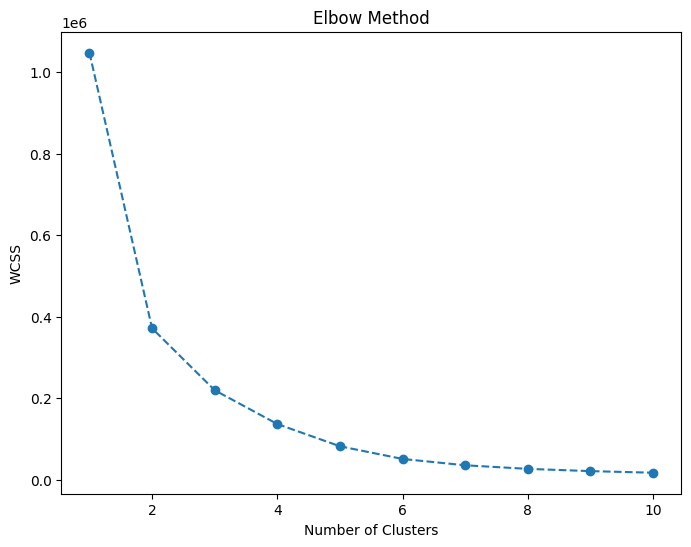

In [49]:
# Plot the elbow method graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### From elbow method it seems to have 4 or 5 group clustering can be done on the basis of price and price per quantity

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


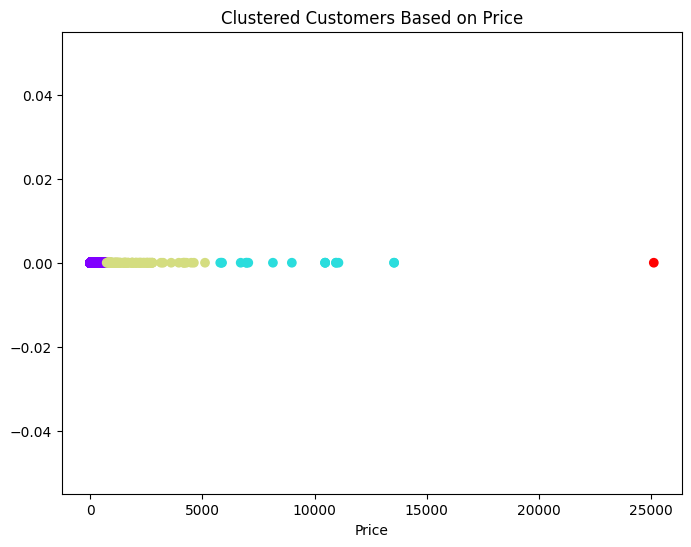

In [52]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Define the price ranges for each cluster
cluster_ranges = []

for i in range(num_clusters):
    if i == 0:
        lower_bound = 0
    else:
        lower_bound = cluster_centers[i - 1][0]
    upper_bound = cluster_centers[i][0]
    cluster_ranges.append((lower_bound, upper_bound))

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Price'], [0] * len(data), c=data['Cluster'], cmap='rainbow')
plt.title('Clustered Customers Based on Price')
plt.xlabel('Price')
plt.show()


In [53]:
cluster_ranges

[(0, 3.633138547736626),
 (3.633138547736626, 9045.30705882353),
 (9045.30705882353, 1453.9028888888895),
 (1453.9028888888895, 25111.09)]

### we see our consumer are divided in 4 catecogry of purchase price

In [54]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

0    1047675
2        180
1         17
3          1
Name: Cluster, dtype: int64


### so out most of consumer lie in \$0 to \$3.63 price purchase

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

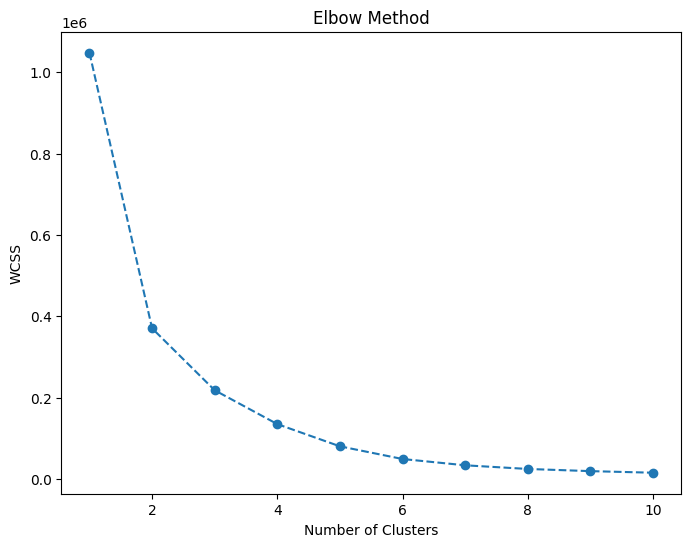

In [55]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Price per Quantity']])
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### on the basis of price per quantity also it seems to have 4 cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


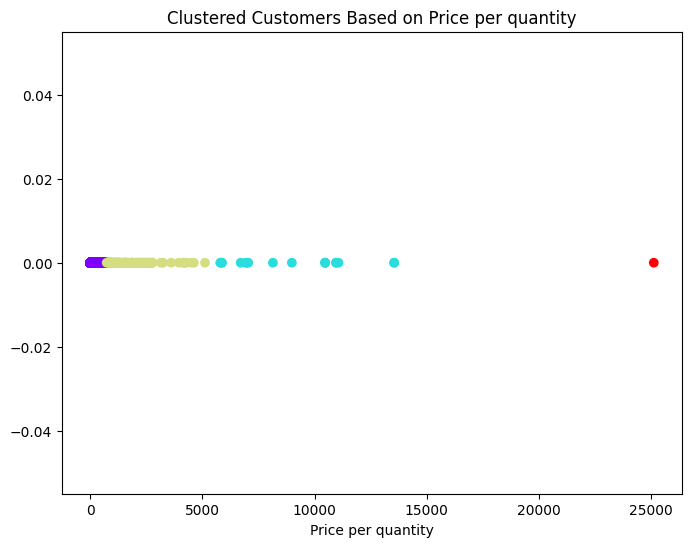

In [56]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Define the price ranges for each cluster
cluster_ranges = []

for i in range(num_clusters):
    if i == 0:
        lower_bound = 0
    else:
        lower_bound = cluster_centers[i - 1][0]
    upper_bound = cluster_centers[i][0]
    cluster_ranges.append((lower_bound, upper_bound))

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Price per Quantity'], [0] * len(data), c=data['Cluster'], cmap='rainbow')
plt.title('Clustered Customers Based on Price per quantity')
plt.xlabel('Price per quantity')
plt.show()

In [57]:
print(cluster_ranges)
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

[(0, 2.194496127646506), (2.194496127646506, 9045.30705882353), (9045.30705882353, 1466.163785310734), (1466.163785310734, 25111.09)]
0    1047678
2        177
1         17
3          1
Name: Cluster, dtype: int64


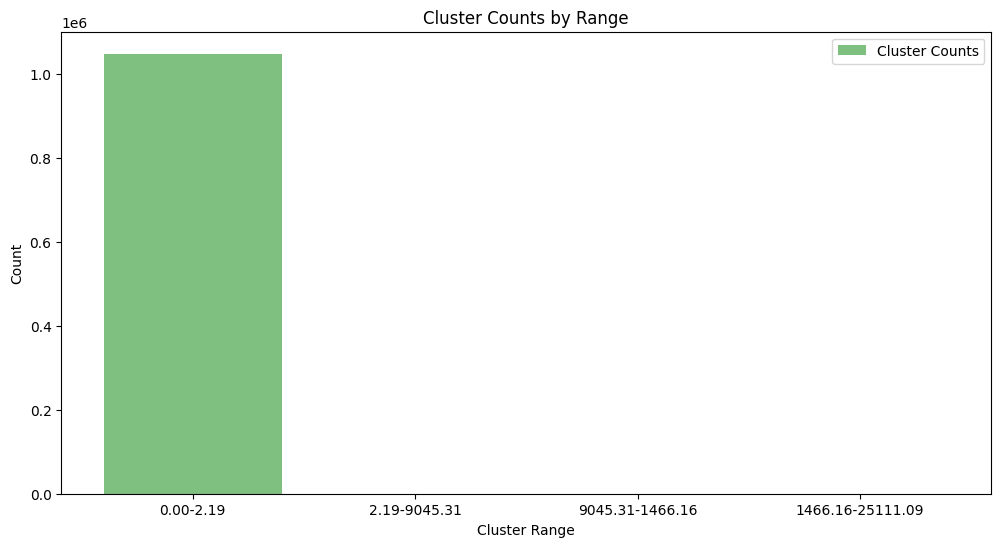

In [68]:


# Plot cluster counts with cluster ranges on the x-axis
lower_bounds = [range[0] for range in cluster_ranges]
upper_bounds = [range[1] for range in cluster_ranges]

# Plot cluster counts with cluster ranges on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(range(len(cluster_counts)), cluster_counts, alpha=0.5, color='g', align='center', label='Cluster Counts')
plt.xlabel('Cluster Range')
plt.ylabel('Count')
plt.title('Cluster Counts by Range')
plt.xticks(range(len(cluster_counts)), [f'{lb:.2f}-{ub:.2f}' for lb, ub in zip(lower_bounds, upper_bounds)])
plt.legend()

plt.show()

### From above 2 clustering result , Most of transaction occur in item value 0 to 3.6  and per quantitiy sales occur is of 0  to  2.19

## Q2 How would you define a loyal customer?

In [76]:
print("Total consumer entry in trasaction :",len(df3['Customer ID']))
print("Unique consumer :",df3['Customer ID'].nunique())

Total consumer entry in trasaction : 1067371
Unique consumer : 5942


### This means that there is consumer how make more number of transaction throughtout this 2 year. This can be one parameter of loyal consumer

### Must  also consider value  of transaction the make . For now let us define it as number of visit.


In [80]:
df_positive_price = df3[df3['Price'] >= 0]

# Group by 'Customer ID' and collect unique invoices
temp = df_positive_price.groupby(['Customer ID'])['Invoice'].unique()

temp = pd.DataFrame({'CustomerID': temp.index, 'Invoice': temp.values})
temp['CustomerID'] = temp['CustomerID'].astype(int)
# Calculate the number of returns for each customer
temp['Returns'] = [len(invoices) for invoices in temp['Invoice']]
temp_sorted = temp.sort_values(by='Returns', ascending=False)
temp_sorted.head(10)

,CustomerID,Invoice,Returns
2565,14911,"[489520, 490542, 490687, 490972, C490997, C491...",510
402,12748,"[490362, C490748, 491759, 492224, 492423, 4925...",365
5495,17841,"[489875, 490302, 490711, 490714, C491632, 4916...",289
2965,15311,"[489514, 489733, 490301, 490504, 490817, 49112...",270
2260,14606,"[490024, C490507, 490512, 490990, C491430, 491...",259
743,13089,"[489877, 490694, 491670, 491828, C492213, C492...",247
1810,14156,"[489546, 489550, 490127, C490721, C490934, C49...",202
2181,14527,"[489792, C490269, 490286, 490941, 491192, 4917...",190
2300,14646,"[489889, 489890, 490964, 492248, 492724, 49414...",164
1348,13694,"[490320, 490324, 490327, 490725, 490726, 49181...",164


### These are top 10 repeated costomer who come make make positive transaction  and Hence can be treated as loyal consumer

## Q3 What is the most popular time of year based on this sales data?

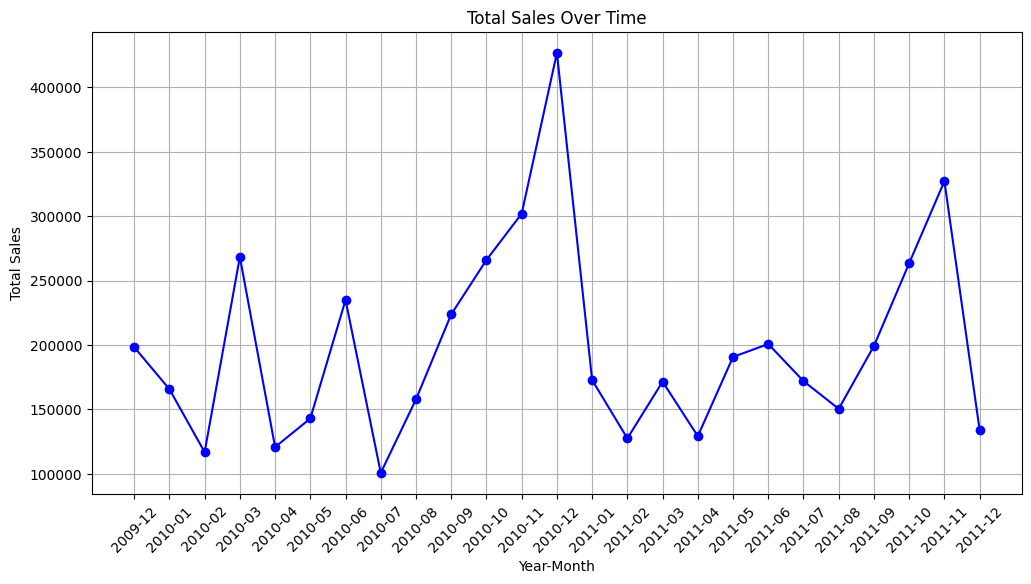

In [83]:
# Convert 'InvoiceDate' to a datetime object
# Convert 'InvoiceDate' to a datetime object
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

# Extract the year and month from 'InvoiceDate' for grouping
df3['YearMonth'] = df3['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and calculate the total sales for each month
monthly_sales = df3.groupby('YearMonth')['Price'].sum()

# Convert 'YearMonth' values to strings for plotting
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

# Plot the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()







### From this its clear that number of transaction (so sales ) increase in month of November than in usual

## Q4 Is there any seasonality in data? Explain with supportive evidence?

### Monthly Seasonality

<ipython-input-91-b089ad153e17>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df3.resample('M').sum()


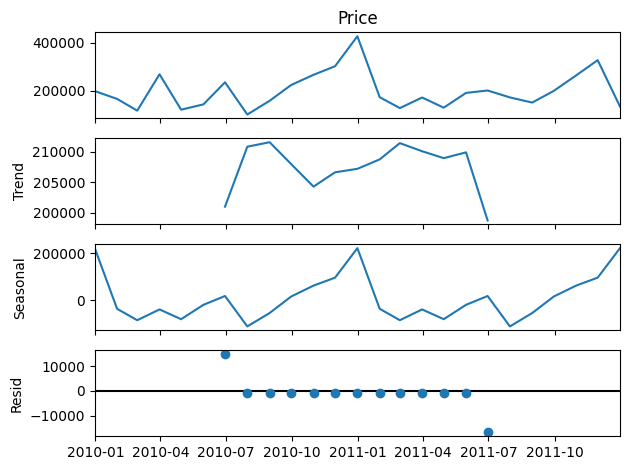

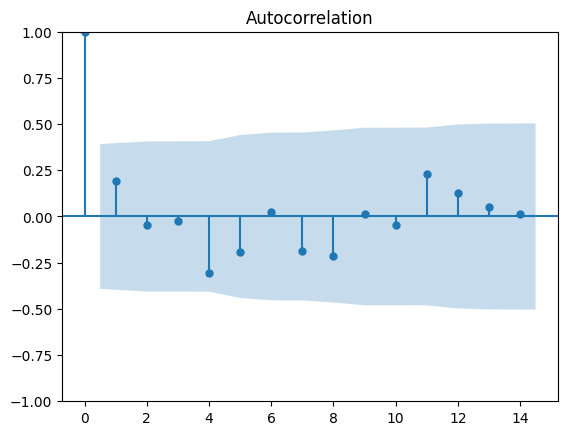

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf



# Convert 'InvoiceDate' to a datetime object
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

# Set 'InvoiceDate' as the index
df3.set_index('InvoiceDate', inplace=True)

# Resample data to a monthly frequency and sum the sales and prices for each month
monthly_sales = df3.resample('M').sum()

# Perform seasonal decomposition to check for seasonality
result = seasonal_decompose(monthly_sales['Price'], model='additive')
result.plot()
plt.show()

# Plot the autocorrelation function (ACF) to identify seasonality
plot_acf(monthly_sales['Price'])
plt.show()




### Daily Seasonality

<ipython-input-93-ff934be8043a>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = df3.resample('D').sum()


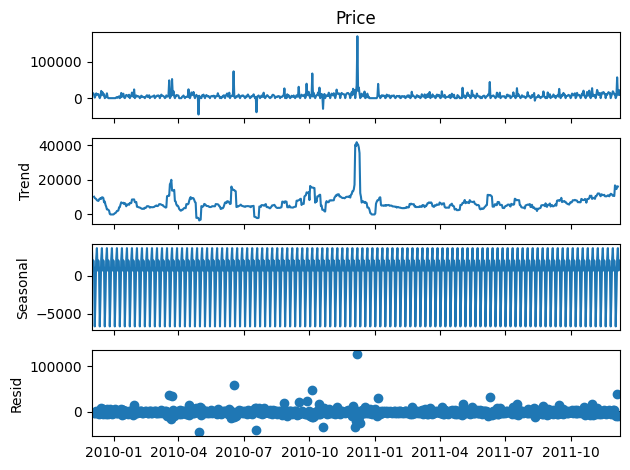

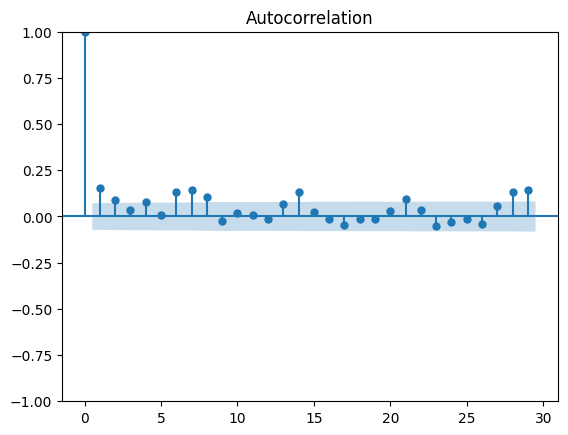

In [93]:
# Set 'InvoiceDate' as the index
# df3.set_index('InvoiceDate', inplace=True)

# Resample data to a daily frequency and sum the sales and prices for each day
daily_sales = df3.resample('D').sum()

# Perform seasonal decomposition to check for daily seasonality
result = seasonal_decompose(daily_sales['Price'], model='additive')
result.plot()
plt.show()

# Plot the autocorrelation function (ACF) to identify daily seasonality
plot_acf(daily_sales['Price'])
plt.show()

### Weekly Seasonality

<ipython-input-94-af74ad15295c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = df3.resample('W-SUN').sum()


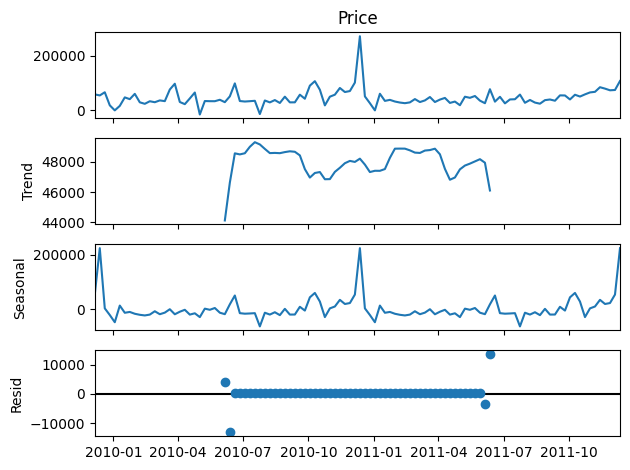

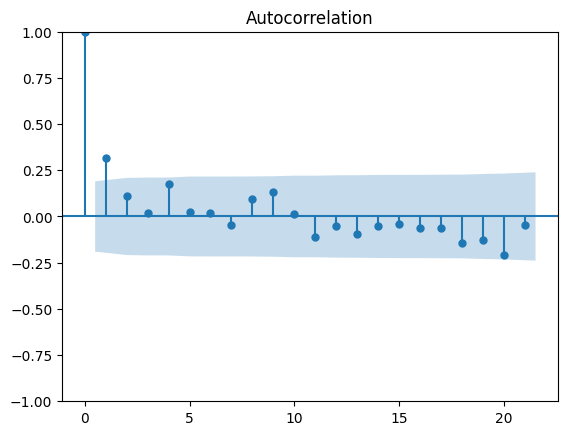

In [94]:
weekly_sales = df3.resample('W-SUN').sum()

# Perform seasonal decomposition to check for weekly seasonality
result = seasonal_decompose(weekly_sales['Price'], model='additive')
result.plot()
plt.show()

# Plot the autocorrelation function (ACF) to identify weekly seasonality
plot_acf(weekly_sales['Price'])
plt.show()

### seasonal autocorrelation plot would show spikes at lags equal to the period of the seasonality.
### NO clear seasonality is observerd on daily weekly and monthly plot

In [105]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'InvoiceDate' to a datetime object
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

# Group data by 'Customer ID' and calculate customer tenure
customer_tenure = df3.groupby('Customer ID')['InvoiceDate'].agg(['min', 'max'])
customer_tenure['Tenure'] = (customer_tenure['max'] - customer_tenure['min']).dt.days
print(customer_tenure.head(10))




                            min                 max  Tenure
Customer ID                                                
12346.0     2009-12-14 08:34:00 2011-01-18 10:17:00     400
12347.0     2010-10-31 14:20:00 2011-12-07 15:52:00     402
12348.0     2010-09-27 14:59:00 2011-09-25 13:13:00     362
12349.0     2009-12-04 12:49:00 2011-11-21 09:51:00     716
12350.0     2011-02-02 16:01:00 2011-02-02 16:01:00       0
12351.0     2010-11-29 15:23:00 2010-11-29 15:23:00       0
12352.0     2010-11-12 10:20:00 2011-11-03 14:37:00     356
12353.0     2010-10-27 12:44:00 2011-05-19 17:47:00     204
12354.0     2011-04-21 13:11:00 2011-04-21 13:11:00       0
12355.0     2010-05-21 11:59:00 2011-05-09 13:49:00     353


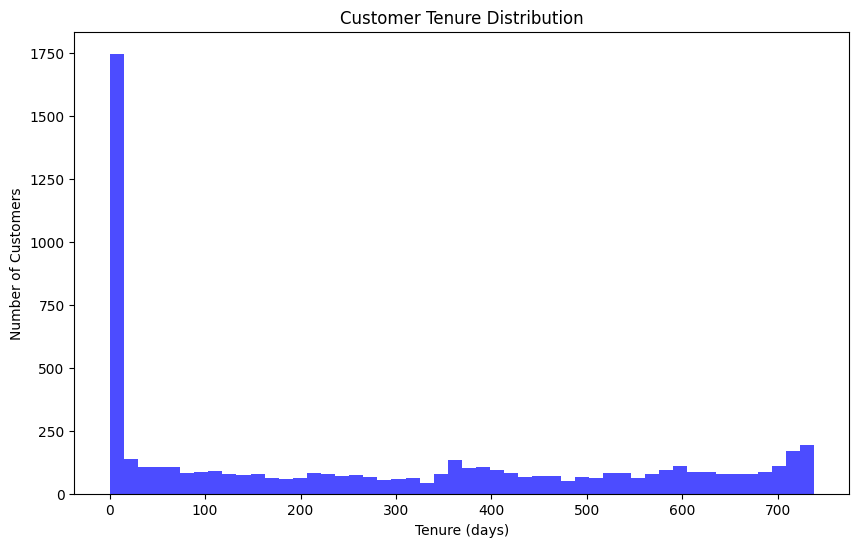

In [106]:
# Plot a histogram of customer tenure
plt.figure(figsize=(10, 6))
plt.hist(customer_tenure['Tenure'], bins=50, color='blue', alpha=0.7)
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (days)')
plt.ylabel('Number of Customers')
plt.show()

In [107]:
mean_tenure = customer_tenure['Tenure'].mean()
median_tenure = customer_tenure['Tenure'].median()

print("Mean Tenure:", mean_tenure)
print("Median Tenure:", median_tenure)

Mean Tenure: 275.3963312016156
Median Tenure: 225.0


### Median of tenure is 225 . This means most of costomer engagement is of 225 days .